In [3]:
# conda install opencv

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dain\anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa95532_0        14.5 MB
    libopencv-4.0.1            |       hbb9e17c_0        28.6 MB
    opencv-4.0.1               |   py38h2a7c758_0          22 KB
    py-opencv-4.0.1            |   py38he44ac1e_0         1.5 MB
    ------------------------------------------------------------
                                           Total:        44.6 MB

The following NEW packages will be INSTALLED:

  libopencv          pkgs/main/win-64::libopenc

In [2]:
import cv2
cv2.__version__

'4.0.1'

## 8.1 이미지 로드하기
전처리를 위해 이미지를 로드하고 싶습니다.

OpenCV의 imread를 사용합니다.

In [13]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

파이썬의 그래프 라이브러리인 Matplotlib을 사용하여 이미지를 출력합니다.

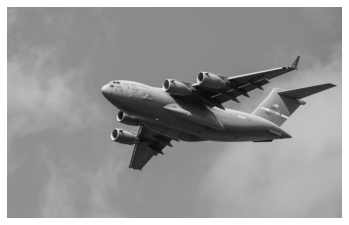

In [15]:
# 이미지를 출력합니다.
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

근본적으로 이미지는 하나의 데이터입니다 imread를 사용하면 이 데이터를 친숙한 데이터 타입인 넘파이 배열로 변환합니다.

In [14]:
type(image)

numpy.ndarray

이미지를 행렬로 변환했습니다. 여기에서 행렬의 각 원소는 개별 픽셀에 해당합니다. 이 행렬의 실제 값을 확인해볼 수도 있습니다.

In [16]:
# 이미지 데이터를 확인합니다.
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

이 이미지의 해상도는 3600$\times$2270이고 행렬의 차원과 같습니다.

In [17]:
# 차원을 확인합니다.
image.shape

(2270, 3600)

행렬의 각 원소가 의미하는 것은 무엇일까요? 흑백 이미지에서는 개별 원소의 값이 픽셀 강도입니다. 강도는 검정색(0)에서 흰색(255)까지의 범위를 가집니다. 예를 들어 이 이미지에서 가장 우측 상단의 픽셀의 강도는 140입니다.

In [18]:
# 첫 번째 픽셀을 확인합니다.
image[0,0]

140

이 행렬의 각 원소는 파랑, 초록, 빨강(BGR)에 해당하는 세 개의 값을 가질 수도 있습니다.

In [19]:
# 컬러로 이미지를 로드합니다.
image_bgr = cv2.imread("plane.jpg", cv2.IMREAD_COLOR)

# 픽셀을 확인합니다.
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

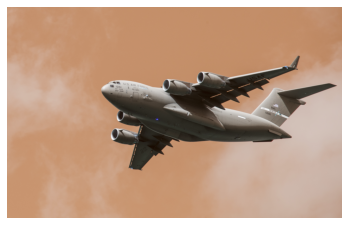

In [21]:
plt.imshow(image_bgr), plt.axis("off")
plt.show()

한 가지 주의할 점은 기본적으로 OpenCV는 BGR을 사용한다는 것입니다. 하지만 Matplotlib을 비롯하여 대부분의 이미지 애플리케이션은 RGB를 사용합니다. 즉 빨강과 파랑이 바뀌어 있습니다. Matplotlib에서 OpenCV 컬러 이미지를 올바르게 출력하려면 먼저 컬러를 RGB로 바꾸어야 합니다.

<function matplotlib.pyplot.show(close=None, block=None)>

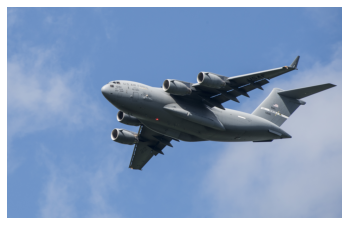

In [20]:
# RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 이미지를 출력합니다.
plt.imshow(image_rgb), plt.axis("off")
plt.show

## 8.2 이미지 저장하기
전처리를 위해 이미지를 저장하기

OpenCV의 imwrite를 사용합니다.

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 저장합니다.
cv2.imwrite("plane_new.jpg", image)

True

OpenCV의 imwrite는 지정한 파일 경로에 이미지를 저장합니다. 이미지 포맷은 파일 확장자에 의해서 정의됩니다(.jpg,.png 등). 주의해야 할 점은 imwrite가 에러나 확인 메시지 없이 기존의 파일을 덮어쓴다는 것입니다.

## 8.3 이미지 크기 변경하기
전처리에 알맞도록 이미지 크기를 변경하고 싶습니다.

resize를 사용하여 이미지 크기를 바꿉니다.

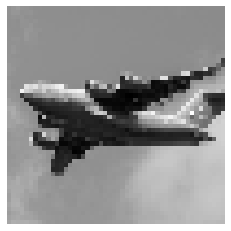

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 크기를 50x50 픽셀로 바꿉니다.
image_50x50 = cv2.resize(image,(50,50))

# 이미지를 출력합니다.
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

이미지 크기 변경은 두 가지 이유로 이미지 전처리에서 흔한 작업입니다. 첫째, 이미지들은 제각기 다양한 크기를 가집니다. 특성으로 사용하려면 동일한 차원으로 만들어야 합니다. 이미지 크기를 표준화하는 데는 대가가 따릅니다. 이미지는 행렬에 정보를 담고 있기 때문에 이미지 크기를 줄이면 행렬 크기와 거기에 담긴 정보도 줄어듭니다. 둘째, 머신러닝은 수천 또는 수십만 개의 이미지가 필요할 수 있습니다. 이미지가 클수록 메모리 사용량을 크게 줄일 수 있습니다. 머신러닝에서 많이 사용하는 이미지 크기는 32x32, 64x64, 96x96, 256x256입니다.

## 8.4 이미지 자르기
이미지 주변을 제거하여 차원을 줄이고 싶습니다.

이미지는 2차원 넘파이 배열로 저장됩니다. 배열 슬라이싱을 사용해 간단하게 이미지를 자를 수 있습니다.

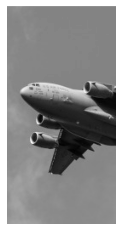

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 열의 처음 절반과 모든 행을 선택합니다.
image_cropped = image[:,:128]

# 이미지를 출력합니다.
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

OpenCV는 이미지를 행렬로 표현하기 때문에 남기고 싶은 행과 열을 선택하여 간단하게 이미지를 자를 수 있습니다. 이미지에서 특정 부분을 남기고 싶다면 특히 이런 자르기 기능이 유용합니다. 예를 들어 고정된 감시 카메라에서 얻은 이미지라면 특정 관심 영역만 남기고 이미지를 자를 수 있습니다.

## 8.5 이미지 흐리게 하기
이미지를 부드럽게 흐리고 싶습니다.

이미지를 흐리게 하려면 각 픽셀을 주변 픽셀의 평균값으로 변환하면 됩니다. 주변 픽셀에 수행되는 연산을 수학적으로 kernel이라 표현합니다. 커널의 크기는 흐림의 정도를 결정합니다. 커널이 클수록 이미지가 더 부드러워집니다. 다음 예에서 각 픽셀 주변의 5 x 5 커널 평균값으로 이미지를 흐리게 합니다.

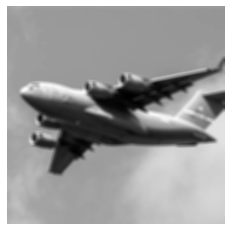

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 흐리게 합니다.
image_blurry = cv2.blur(image, (5,5))

# 이미지를 출력합니다.
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

커널의 크기의 영향을 강조하기 위해 100 x 100 커널로 같은 이미지를 흐리게 만들어보겠습니다.

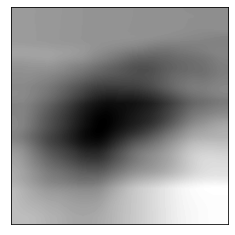

In [26]:
# 이미지를 흐리게 합니다.
image_very_blurry = cv2.blur(image, (100,100))

# 이미지를 출력합니다.
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

커널은 이미지를 선명하게 만드는 것부터 경계선 감지(edge detection)까지 이미지 처리 작업을 하는데 널리 사용됩니다. 흐림 처리에 사용한 커널은 다음과 같습니다.

In [27]:
# 커널을 만듭니다. 
kernel = np.ones((5,5)) / 25.0

kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

커널의 중앙 원소가 변환되는 픽셀이고 나머지 원소는 그 픽셀의 이웃입니다. 모든 원소가 동일한 값을 가졌기 때문에(모두 더하면 1이 되도록 정규화되었습니다) 관심 대상 픽셀의 결괏값에 미치는 영향은 동일합니다. filter2D 함수로 커널을 이미지에 직접 적용하여 비슷한 흐림 효과를 만들 수 있습니다.

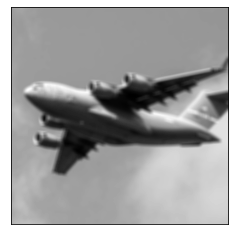

In [28]:
# 커널을 적용합니다.
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

머신러닝에서 커널은 여러 가지 의미로 사용됩니다. 9장과 17장에서는 커널 PCA와 서포트 벡터 머신이 사용하는 비선형 함수를 커널이라 부릅니다. 20장에서는 신경망의 가중치를 커널이라 부릅니다. 

커널 크기는 (너비, 높이)로 지정합니다. blur 함수는 각 픽셀에 커널 개수의 역수를 곱하여 모두 더합니다. 이 값이 중앙 픽셀의 값이 됩니다. 자주 사용하는 다른 함수는 가우시안 분포를 사용하는 가우시안 블러입니다.

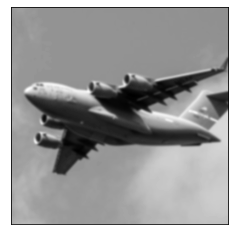

In [29]:
# 가우시안 블러를 적용합니다. 
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0)

plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

GaussianBlur 함수의 세 번째 매개변수는 X축(너비) 방향의 표준편차입니다. 0으로 지정하면 ((너비-1)*0.5-1)*0.3+0.8와 같이 계산합니다. Y축 방향의 표준편차는 기본값이 0입니다.

가우시안 블러에 사용한 커널은 각 축 방향으로 가우시안 분포를 따르는 1차원 배열을 만든 다음 외적하여 생성합니다. getGaussianKernel 함수를 사용하여 이런 1차원 배열을 만들고 넘파이 outer 함수로 외적을 계산할 수 있습니다.

In [31]:
gaus_vector = cv2.getGaussianKernel(5, 0)
gaus_vector

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

In [32]:
# 벡터를 외적하여 커널을 만듭니다.
gaus_kernel = np.outer(gaus_vector, gaus_vector)
gaus_kernel

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

해결에서와 같이 직접 만든 커널을 filter2D 함수에 적용할 수 있습니다.

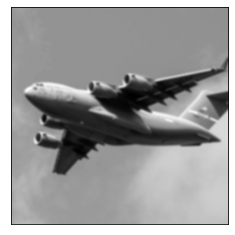

In [33]:
# 커널을 적용합니다.
image_kernel = cv2.filter2D(image, -1, gaus_kernel)

plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

filter2D 함수의 두 번째 매개변수는 픽셀값의 범위를 지정하는 것으로 -1이면 입력과 동일한 범위를 유지합니다.

## 8.6 이미지 선명하게 하기
이미지를 선명하게 만들고 싶습니다.

대상 픽셀을 강조하는 커널을 만들고 filer2D를 사용하여 이미지에 커널을 적용합니다.

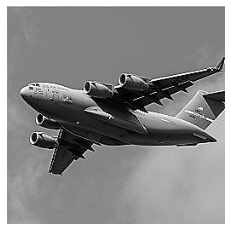

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1,0]])

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

# 이미지를 출력합니다.
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

선명하게 하는 것은 흐리게 하는 것과 비슷합니다. 주변 픽셀값의 평균을 계산하는 커널을 사용하는 대신 중앙 픽셀을 부각하는 커널을 만듭니다. 이로 인한 효과로 이미지의 경계선에서 대비가 더욱 두드러집니다.

## 8.7 대비 높이기
이미지 픽셀 사이의 대비를 증가시키고 싶습니다.

히스토그램 평활화(histogram equalization)는 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구입니다. 흑백 이미지에는 OpenCV의 equalizeHist 함수를 바로 적용할 수 있습니다.

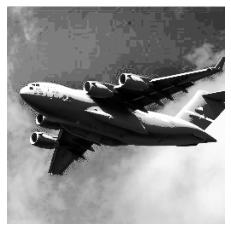

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상시킵니다.
image_enhanced = cv2.equalizeHist(image)

# 이미지를 출력합니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

컬러 이미지는 먼저 YUV 컬러 포맷으로 변환해야 합니다. Y는 luma 또는 밝기이고 U와 V는 컬러를 나타냅니다. 변환한 뒤에 equalizeHist를 적용할 수 있습니다. 그다음 다시 BGR이나 RGB로 바꿉니다.

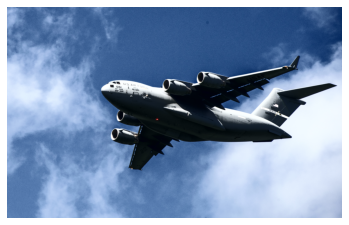

In [4]:
image_bgr = cv2.imread("plane.jpg")

# YUV로 바꿉니다.
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# 히스토그램 평활화를 적용합니다.
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# RGB로 바꿉니다.
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# 이미지를 출력합니다.
plt.imshow(image_rgb), plt.axis("off")
plt.show()

히스토그램 평활화는 픽셀값의 범위가 커지도록 이미지를 변환합니다. 

결과 이미지가 종종 현실 이미지처럼 보이지 않지만 이미지는 단지 데이터의 시각적 표현일 뿐이라는 것을 기억하세요. 히스토그램 평활화는 관심 대상을 다른 객체나 배경과 잘 구분되도록 만들어줍니다(항상 그런 것은 아닙니다). 이런 기능은 이미지 전처리 파이프라인에 도움이 될 수 있습니다.

## 8.8 색깔 구분하기
이미지에서 한 색깔을 구분하고 싶습니다.

색 범위를 정의하고 이미지에 mask를 적용합니다.

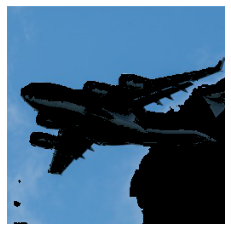

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드합니다.
image_bgr = cv2.imread("plane_256x256.jpg")

# BGR에서 HSV로 변환합니다.
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# HSV에서 파랑 값의 범위를 정의합니다.
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# 마스크를 만듭니다.
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# 이미지에 마스크를 적용합니다.
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# BGR에서 RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# 이미지를 출력합니다.
plt.imshow(image_rgb), plt.axis("off")
plt.show()

OpenCV에서 색깔 구분은 직관적입니다. 첫째, 이미지를 HSV(색상, 채도, 명도)로 변환합니다. 둘째, 격리시킬 값의 범위를 정의합니다. 아마 가장 어렵고 시간이 많이 드는 작업입니다. 셋째, 이미지에 적용할 마스크를 만듭니다(마스크의 흰색 영역만 유지됩니다).

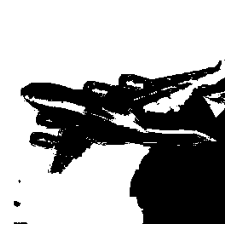

In [3]:
# 마스크를 출력합니다.
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

마지막으로 bitwise_and 함수를 사용하여 이미지에 마스크를 적용하고 원하는 포맷으로 변환합니다.

## 8.9 이미지 이진화하기
주어진 이미지를 단순한 버전으로 출력하고 싶습니다.

이미지 이진화(임계처리, thresholding)는 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정입니다. 더 고급 기술은 적응적 이진화(임계처리, adaptive thresholding)로, 픽셀의 임곗값이 주변 픽셀의 강도에 의해 결정됩니다. 이미지 안의 영역마다 빛 조건이 달라질 때 도움이 됩니다.

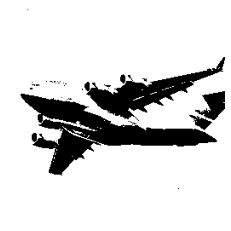

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_grey = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 적응적 이진화를 적용합니다.
max_output_value = 288
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# 이미지를 출력합니다.
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

해결의 adaptiveThreshold 함수에는 네 개의 중요한 매개변수가 있습니다. max_output_value는 출력 픽셀 강도의 최대값을 결정합니다. cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 픽셀의 임곗값을 주변 픽셀 강도의 가중치 합으로 설정합니다. 가중치는 Gaussian window에 의해 결정됩니다. 또는 cv2.ADAPTIVE_THRESH_MEAN_C로 주변 픽셀의 평균을 임곗값으로 설정할 수 있습니다.

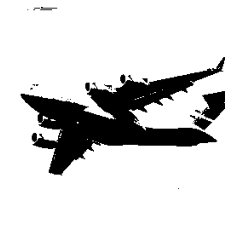

In [9]:
# cv2.ADAPTIVE_THRESH_MEAN_C를 적용합니다.
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

# 이미지를 출력합니다.
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

마지막 두 개의 매개변수는 블록 크기(픽셀의 임곗값 결정에 사용하는 주변 영역의 크기)와 계산된 임곗값에서 뺄 상수(임곗값을 수동으로 미세 조정하는 데 사용하는 값)입니다.

이미지 이진화의 주요 장점은 대부분 중요한 요소를 유지하면서 이미지의 노이즈를 제거하는 것입니다. 예를 들어 이미지 이진화는 인쇄물을 찍은 사진에서 글자를 분리해내기 위해 자주 사용됩니다.

## 8.10 배경 제거하기
이미지의 전경만 분리해내고 싶습니다.

원하는 전경 주위에 사각형 박스를 그리고 grabCut 알고리즘을 실행합니다.

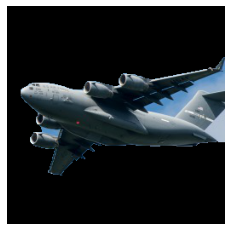

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드하고 RGB로 변환합니다.
image_bgr = cv2.imread("plane_256x256.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이
rectangle = (0, 56,  256, 150)

# 초기 마스크를 만듭니다.
mask = np.zeros(image_rgb.shape[:2],np.uint8)

# grabCut에 사용할 임시 배열을 만듭니다.
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# grabCut을 실행합니다.
cv2.grabCut(image_rgb, # 원본 이미지
            mask, # 마스크
            rectangle, # 사각형
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            5, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화

# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# 이미지를 출력합니다.
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

여기에서 첫 번째로 언급할 것은 그랩컷이 잘 작동하더라도 여전히 이미지에 남은 배경이 있다는 점입니다. 이때 다시 처음으로 돌아가서 직접 이 영역을 배경으로 지정할 수 있습니다. 하지만 실전에서 수천 장의 이미지를 각각 수동으로 고치는 것은 불가능합니다. 이미지에 일부 배경이 남아 있는 것을 수용하는 편이 좋습니다. 

해결에서 먼저 전경이 들어있는 영역 주위를 사각형으로 표시했습니다. 그랩컷은 이 사각형 밖에 있는 모든 것이 배경이라고 가정하고 이 정보를 사용하여 사각형 안에 있는 배경을 찾습니다. 그다음 배경과 전경 영역을 구분할 수 있는 마스크를 만듭니다. 

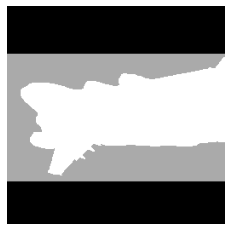

In [4]:
# 마스크를 출력합니다.
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

검은 영역은 배경이라고 확실하게 가정한 사각형의 바깥쪽의 영역입니다. 회색 영역은 그랩컷이 배경이라고 생각하는 영역이고 흰색 영역은 전경입니다.

이 마스크를 사용하여 검은색과 회색 영역을 합친 두 번째 마스크를 만듭니다.

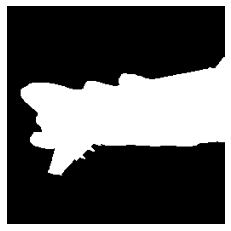

In [5]:
# 마스크를 출력합니다.
plt.imshow(mask_2, cmap="gray"), plt.axis("off")
plt.show()

두 번째 마스크를 이미지에 적용하여 전경만 남깁니다.

* 그랩컷 알고리즘(http://bit.ly/2wgbPIS)

## 8.11 경계선 감지하기
이미지에 있는 경계선(edge)을 찾고 싶습니다.

Canny 경계선 감지기와 같은 경계선 감지 기술을 사용합니다.

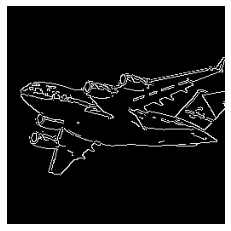

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_gray = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산합니다.
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정합니다.
lower_threshold = int(max(0, (1.0 -0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 이미지를 출력합니다.
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

경계선 감지는 CV의 주요 관심 대상입니다. 경계선은 많은 정보가 담긴 영역이기 중요합니다. 예를 들어 이 이미지에서 하늘 영역의 일부는 다른 하늘 지역과 매우 비슷하기 때문에 특별하거나 흥미있는 정보를 가지고 있지 않습니다. 그러나 하늘 배경이 비행기와 만나는 영역은 많은 정보를 가지고 있습니다(예를 들면 물체의 형태), 경계선 감지를 사용하여 정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있습니다.

경계선을 감지할 수 있는 기법은 많습니다(Sobel 필터, Laplacian 경계선 감지기 등). 해결에서는 널리 사용되는 캐니 경계선 감지기를 사용합니다. 캐니 경계선 감지기의 작동 방식을 설명하는 것은 이 책의 범위를 넘어섭니다. 한 가지 언급할 점은 캐니 감지기는 gradient 임곗값의 저점과 고점을 나타내는 두 매개변수가 필요하다는 것입니다. 낮은 임곗값과 높은 임곗값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주됩니다. 높은 임곗값보다 큰 픽셀은 강한 경계선 픽셀로 간주됩니다. OpenCV의 Canny 함수는 낮은 임곗값과 높은 임곗값이 필수 매개변수입니다. 해결에서 낮은 임곗값과 높은 임곗값을 이미지 중간 픽셀 강도의 1 표준편차 아래 값과 위 값으로 설정했습니다. 일반적으로 Canny를 전체 이미지 모음에 적용하기 전에 몇 개의 이미지를 테스트하여 낮은 임곗값과 높은 임곗값의 적절한 쌍을 찾는 것이 좋은 결과를 만듭니다.

## 8.12 모서리 감지하기
이미지에서 모서리를 감지하고 싶습니다.

Harris 모서리 감지의 OpenCV 구현인 cornerHarris를 사용합니다.

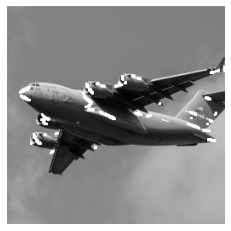

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_bgr = cv2.imread("plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수를 설정합니다.
block_size = 2
aperture = 29
free_parameter = 0.04

# 모서리를 감지합니다.
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# 모서리 표시를 부각시킵니다.
detector_responses = cv2.dilate(detector_responses, None)


# 임곗값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02

image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

# 흑백으로 변환합니다.
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

해리스 모서리 감지기는 두 개의 경계선이 교차하는 지점을 감지하는 방법으로 널리 사용됩니다. 모서리를 감지하려는 이유는 경계선을 감지하는 것과 같습니다. 모서리는 정보가 많은 포인트입니다. 해리스 모서리 감지기는 윈도(또는 이웃이나 patch라고도 부릅니다) 안의 픽셀이 작은 움직임에도(윈도를 흔든다고 상상하세요) 크게 변하는 윈도를 찾습니다. cornerHarris는 모서리 감지에 사용하는 중요한 매개변수 세 개를 가집니다. 첫째, block_size는 각 픽셀에서 모서리 감지에 사용되는 이웃 픽셀 크기입니다. 둘째, aperture는 사용하는 소벨 커널 크기입니다. 마지막으로 값이 클수록 부드러운 모서리를 구별하는 매개변수가 있습니다.

만들어진 결과는 가능성 있는 모서리를 나타내는 흑백 이미지입니다.

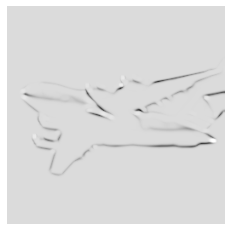

In [9]:
# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap="gray"), plt.axis("off")
plt.show()

그다음 임곗값을 적용하여 가장 가능성이 높은 모서리만 남깁니다. 또는 해리스 감지기와 유사한 방식으로 작동하는 Shi-Tomasi 모서리 감지기(goodFeaturesToTrack)를 사용하여 뚜렷하게 나타난 모서리를 지정된 개수만큼 찾아낼 수 있습니다. goodFeaturesToTrack은 세 개의 주요 매개변수가 있습니다. 감지할 모서리 개수, 모서리가 될 최소 품질(0에서 1사이), 모서리 사이의 최소 유클리드 거리입니다.

<ipython-input-11-9255ef85556a>:20: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)


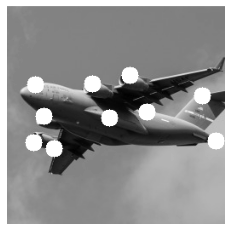

In [11]:
# 이미지를 로드합니다.
image_bgr = cv2.imread("plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# 모서리를 감지합니다.
corners = cv2.goodFeaturesToTrack(image_gray,
                                 corners_to_detect,
                                 minimum_quality_score,
                                 minimum_distance)
corners = np.float32(corners)

# 모서리마다 흰 원을 그립니다.
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)
    
# 흑백으로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_rgb, cmap="gray"), plt.axis("off")
plt.show()

## 8.13 머신러닝 특성 만들기
이미지를 머신러닝에 필요한 샘플로 변환하고 싶습니다.

넘파이의 flatten 메서드를 사용하여 이미지 데이터가 담긴 다차원 배열을 샘플값이 담긴 벡터로 변환할 수 있습니다.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 10x10 픽셀 크기로 변환합니다.
image_10x10 = cv2.resize(image, (10,10))

# 이미지 데이터를 1차원 벡터로 변환합니다.
image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

이미지는 픽셀 격자로 표현됩니다. 이미지가 흑백일 때 각 픽셀은 하나의 값으로 표현됩니다(즉 픽셀 강도가 흰색이면 1, 검정이면 0입니다). 예를 들면 10$\times$10픽셀 이미지는 다음과 같습니다.

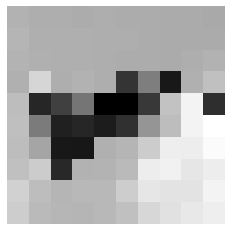

In [3]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

이 경우 이미지 데이터의 차원은 10$\times$10입니다.

In [2]:
image_10x10.shape

(10, 10)

이 배열을 일렬로 펼치면 길이가 100인 벡터가 됩니다.

In [4]:
image_10x10.flatten().shape

(100,)

여기에서 만든 특성 데이터는 다른 이미지에서 얻은 벡터와 연결하여 머신러닝 알고리즘에 주입할 데이터를 만듭니다.

컬러 이미지라면 각 픽셀이 하나의 값이 아니라 여러 개의 값으로(보통 세 개) 표현됩니다. 채널(빨강, 초록, 파랑 등)을 나타내는 각 값이 합쳐져서 픽셀의 최종 색을 만듭니다. 예를 들어 10$\times$10 크기 걸러 이미지라면 샘플마다 300개의 특성값이 만들어집니다.

In [7]:
# 컬러 이미지로 로드합니다.
image_color = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR)

# 이미지를 10x10 픽셀 크기로 변환합니다.
image_color_10x10 = cv2.resize(image_color, (10,10))

# 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력합니다.
image_color_10x10.flatten().shape

(300,)

이미지 처리와 컴퓨터 비전 분야의 대표적인 어려움 중 하나는 이미지의 모든 픽셀이 특성이 되기 때문에 이미지가 커질수록 특성의 개수도 크게 늘어난다는 것입니다.

In [8]:
# 흑백 이미로 로드합니다.
image_256x256_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력합니다.
image_256x256_gray.flatten().shape

(65536,)

이미지가 컬러라면 특성의 개수는 더 늘어납니다.

In [9]:
# 컬러 이미로 로드합니다.
image_256x256_color = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

# 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력합니다.
image_256x256_color.flatten().shape

(196608,)

결과에서 볼 수 있듯이 작은 컬러 이미지라도 거의 200,000개의 특성을 가집니다. 특성의 개수가 샘플의 개수보다 더 많다면 모델을 훈련할 때 문제가 발생할 수 있습니다.

이 문제는 차원에 관한 전략의 모티브가 됩니다. 차원에 관한 전략이란, 데이터에 있는 정보량의 손실을 최소화하면서 특성의 개수를 줄이는 것입니다. 이에 대해서는 이후의 장에서 논의하겠습니다.

## 8.14 평균 색을 특성으로 인코딩하기
이미지의 컬러를 바탕으로 한 특성이 필요합니다.

이미지의 각 픽셀은 여러 컬러 채널(보통 세 개: 빨강, 초록, 파랑)의 조합으로 표현됩니다. 빨강, 초록, 파랑 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 세 개의 컬러 특성을 만듭니다.

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# BGR 이미지로 로드합니다.
image_bgr = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR)

# 각 채널의 평균을 계산합니다.
channels = cv2.mean(image_bgr)

# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다). 
observation = np.array([(channels[2], channels[1], channels[0])])

# 채널 평균값을 확인합니다.
observation

array([[ 90.53204346, 133.11735535, 169.03074646]])

채널 평균값을 직접 확인할 수도 있습니다.

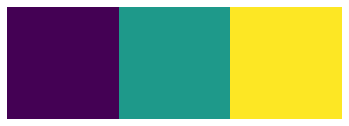

In [11]:
# 이미지를 출력합니다.
plt.imshow(observation), plt.axis("off")
plt.show()

하나의 샘플에 대해 컬러 채널마다 하나씩 세 개의 특성값이 출력됩니다. 이 특성은 다른 특성과 마찬가지로 학습 알고리즘에서 컬러를 기반하여 이미지를 분류하는데 사용할 수 있습니다.

## 8.15 컬러 히스토그램을 특성으로 인코딩하기
이미지에 나타난 컬러를 표현하는 일련의 특성을 만들고 싶습니다.

각 컬러 채널에 대해 히스토그램을 계산합니다.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드합니다.
image_bgr = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR)

# RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 특성값을 담을 리스트를 만듭니다.
features = []

# 각 컬러 채널에 대해 히스토그램을 계산합니다.
colors = ("r","g","b")

# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가합니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                             [i], # 채널 인덱스
                             None, # 마스크 없음
                             [256], # 히스토그램 크기
                             [0,256]) # 범위
    features.extend(histogram)

# 샘플의 특성값으로 벡터를 만듭니다.
observation = np.array(features).flatten()

# 처음 다섯 개의 특성을 출력합니다.
observation[0:5]

array([1008.,  217.,  184.,  165.,  116.], dtype=float32)

RGB 컬러 구조에서 각 컬러는 세 개의 컬러 채널의 조합입니다. 결국 각 채널은 256개의 값 중에 하나를 가집니다(0~255 사이의 정수). 예를 들어 예제 이미지에서 가장 왼쪽 위의 픽셀은 다음과 같은 채널값을 가집니다. 

In [14]:
# RGB 채널값을 확인합니다.
image_rgb[0,0]

array([107, 163, 212], dtype=uint8)

히스토그램은 데이터에서 값의 분포를 나타냅니다. 다음은 간단한 예입니다.

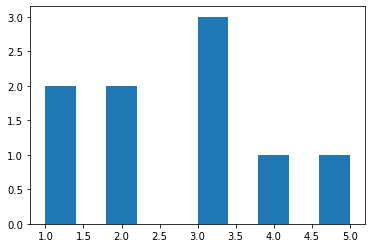

In [15]:
# 판다스를 임포트합니다.
import pandas as pd

# 예시 데이터를 만듭니다.
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])

# 히스토그램을 출력합니다.
data.hist(grid=False)
plt.show()

동일한 기법은 각 컬러 채널에도 적용할 수 있습니다. 다섯 개가 아니라 256개의 값으로 표현됩니다(채널에 가능한 값의 범위). x축은 가능한 256개의 채널값을 나타내고, y축은 이미지의 모든 픽셀에서 나타난 특정 채널값의 횟수입니다.

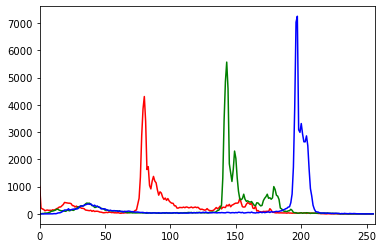

In [19]:
# 각 컬러 채널에 대한 히스토그램을 계산합니다.
colors = ("r","g","b")

# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프를 그립니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                            [i],
                            None,
                            [256],
                            [0,256])
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])

# 그래프를 출력합니다.
plt.show()

히스토그램에서 볼 수 있듯이 모든 픽셀은 거의 0-180 사이의 파랑 채널값을 가지고 있지 않습니다. 반면 많은 픽셀들은 190-210 사시의 파랑 채널값을 가집니다. 이 채널값의 분포는 세 개의 채널을 모두 보여줍니다. 히스토그램은 시각화가 전부가 아닙니다. 컬러 채널마다 256개의 특성이 있기 때문에 하나의 이미지에서 컬러 분포를 표현하는 768개의 특성을 만들 수 있습니다.